In [3]:
from pypot.vrep import from_vrep
from pypot.creatures import PoppyHumanoid

In [4]:
poppy = PoppyHumanoid(simulator = 'vrep')


In [14]:
# poppy.head_z.goal_position = 0.
# poppy.r_shoulder_x.goal_position = -30
poppy.reset_simulation()
# poppy.head_y.goto_position(-30, 2, wait=True)

# poppy.head_z.goto_position(0, 2, wait=True)

# poppy.head_y.goto_position(20, 1, wait=True)

In [16]:
import time

import math

amp = 30 # in degrees
freq = 0.5 # in Hz

current, goal = [], []

t0 = time.time()

while True:
    t = time.time()
    
    # run for 5s
    if t - t0 > 5:
        break

    poppy.head_z.goal_position = amp * math.sin(2 * 3.14 * freq * t)

    
    current.append(poppy.head_z.present_position)
    goal.append(poppy.head_z.goal_position)
    
    time.sleep(0.04)


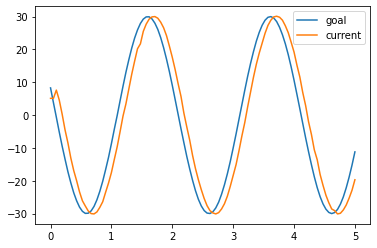

In [18]:
%matplotlib inline

t = linspace(0, 5, len(current))
plot(t, goal)
plot(t, current)

legend(('goal', 'current'))

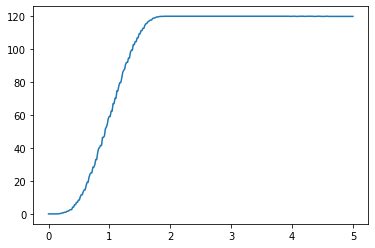

In [19]:
poppy.l_shoulder_x.goto_behavior = 'minjerk'

poppy.l_shoulder_x.goto_position(120, 5)

pos = []
t0 = time.time()

while time.time() - t0 < 5:
    pos.append(poppy.l_shoulder_x.present_position)
    
    time.sleep(0.01)
    
t = linspace(0, 5, len(pos))
plot(t, pos)

In [20]:
poppy.reset_simulation()

Exception in thread Thread-13:
Traceback (most recent call last):
  File "D:\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "D:\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "D:\anaconda3\lib\site-packages\pypot\utils\stoppablethread.py", line 130, in _wrapped_target
    self._target()
  File "D:\anaconda3\lib\site-packages\pypot\utils\stoppablethread.py", line 205, in run
    make_update_loop(self, self._update)
  File "D:\anaconda3\lib\site-packages\pypot\utils\stoppablethread.py", line 175, in make_update_loop
    update_func()
  File "D:\anaconda3\lib\site-packages\pypot\vrep\controller.py", line 82, in update
    self.io.set_motor_force(motor_name=self._motor_name(m), force=t)
  File "D:\anaconda3\lib\site-packages\pypot\vrep\io.py", line 164, in set_motor_force
    self.call_remote_api('simxSetJointForce',
  File "D:\anaconda3\lib\site-packages\pypot\vrep\io.py", line 359, in call_remote_api
  